# NLP Assignment

Importing all the required libraries and modules

In [39]:
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

Opening the text,i.e., Tom Sawyer, in which the licensing and other irrelevant parts have been removed

In [40]:
f=open('tom_2.txt','r')
raw=f.read()
#print(raw)
raw =raw.lower()
#print(raw) # saves the text in raw


Opening the text and changing the text into lowercase

In [ ]:
c=0
word_tokenize_list=word_tokenize(raw)  # tokenizes the text in list of words, contains undesirable contents like punctuations too

word_tokenize_list_counter=Counter(word_tokenize_list)
remove_list=[',','.',"''",'``','--','!','?',';',"'s","n't"]
for i in remove_list:
	del word_tokenize_list_counter[i]
                                        #print(word_tokenize_list_counter)
for i in word_tokenize_list_counter:
	c+=word_tokenize_list_counter[i]

Counting tokens and removing punctuations

In [41]:
print("types=",len(word_tokenize_list_counter))
print("tokens=",c)
print("TTR of the text=",float(len(word_tokenize_list_counter))/c)
frequency=sorted(word_tokenize_list_counter.values())[::-1]
rank=range(1,len(word_tokenize_list_counter)+1)

types= 7487
tokens= 71798
TTR of the text= 0.1042786707150617


Calculating Types, Tokens and TTR of the text


types= 7487

tokens= 71798

TTR of the text= 0.1042786707150617

[5030.60086977]


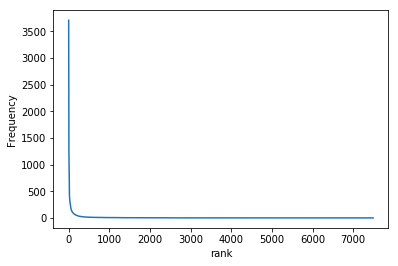

In [66]:
from scipy.optimize import curve_fit
def zipf(x,k):
    return k/x
init_vals=[8000]
best_vals, covar = curve_fit(zipf, rank,frequency, p0=init_vals)
print(best_vals)
plt.plot(rank,frequency)
plt.ylabel('Frequency')
plt.xlabel('rank')
plt.show()


Checking zipf's law by plotting the graph between frequency and rank

Zipf's first law holds true here, i.e., frequency is inversely proportional to rank

Where f*r=constant=k where k comes out to be 5030

In [43]:
length={}
for i in word_tokenize_list_counter:
    a=len(i)
    if a in length:
        length[a]+=word_tokenize_list_counter[i]
    else:
        length[a]=word_tokenize_list_counter[i]
lst_length=sorted(length)
lst_frequency=[length[i] for i in lst_length]
#print(length,lst_length,lst_frequency)



Creating lists of length and frequency of words of a particular length

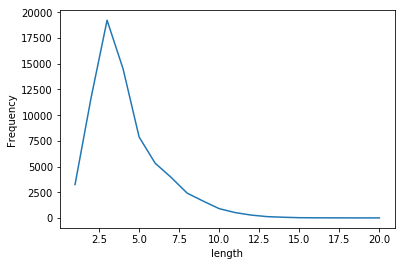

In [8]:
plt.plot(lst_length,lst_frequency)
plt.ylabel('Frequency')
plt.xlabel('length')
plt.show()

Plotting the graph between frequency and length for checking zipf's other laws.
We see that from the graph that zipf's law holds true for most of the words for lenght greater than 3.




meanings
Taking 13 random words 'order','lord','bear','die','adventure','effect','age','peace','clay','hollow','finger','circumstances','harm','confidence','tremendous'

In [71]:
words_lst=['order','lord','bear','die','adventure','effect','age','peace','clay','hollow','finger','circumstances','harm','confidence','tremendous']
freq_list=[]
freq_list_rev=[]
mean_lst_rev=[]
for i in words_lst:
    freq_list.append((counter_new_word_tokenize_list[i]))
#print(freq_list)
mean_lst=[4,4,5,5,3,4,3,3,2,3,3,3,2,2,2]
mean_lst_rev=mean_lst[::-1]
freq_list_rev=freq_list[::-1]
for i in range(len(freq_list_rev)):
    freq_list_rev[i]=(freq_list_rev[i]**(0.5))
print("list of root of frequency",freq_list_rev)
print('list of number of meanings',mean_lst_rev)


list of root of frequency [2.0, 2.449489742783178, 2.449489742783178, 2.6457513110645907, 2.6457513110645907, 3.0, 3.1622776601683795, 3.3166247903554, 3.3166247903554, 3.4641016151377544, 3.7416573867739413, 3.7416573867739413, 3.872983346207417, 4.0, 4.123105625617661]
list of number of meanings [2, 2, 2, 3, 3, 3, 2, 3, 3, 4, 3, 5, 5, 4, 4]


Here we can see that for the given 13 random content word root of the frequency of the word is directly proportional to the number of meanings.

But for the words with lower ranks this hypothesis does not hold true as the lower rank words are mostly function words.

Now Checking Heap's Law


Heap's Law- |V|=kN^beta, where N is size of corpus and |V| is size of the vocabulary

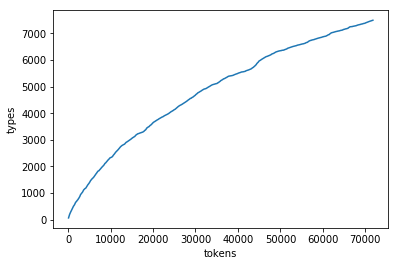

In [37]:
types=[]
tokens=[]
period=0
while(period<=len(word_tokenize_list)):
    period+=100
    k=0

    new_word_tokenize_list=word_tokenize_list[0:period]
    counter_new_word_tokenize_list=Counter(new_word_tokenize_list)
    for i in remove_list:
        del counter_new_word_tokenize_list[i]
    for i in counter_new_word_tokenize_list:
        k+=counter_new_word_tokenize_list[i]
    types.append(len(counter_new_word_tokenize_list))
    tokens.append(k)
#print(types,tokens)
plt.plot(tokens,types)
plt.ylabel('types')
plt.xlabel('tokens')
plt.show()



    
    

Plotting the graph between types and tokens we see that the text is following Heap's Law. Now we calculate the value of k and beta 

In [64]:
from scipy.optimize import curve_fit
def heaps(x,k,beta):
    return k*(x**beta)
init_vals=[40,0.6]
best_vals, covar = curve_fit(heaps, tokens,types, p0=init_vals)
print(best_vals)



[10.4418059   0.59042934]


The value of k comes out to be 10.4418059 and beta = 0.59042934 which suggests that Heap's law holds true for the given corpus